
  # Assignment 8

## Team Paramount

  1. Akash Mishra 
  2. Gopi Chand Yenkipalli
  3. Hiranmai Vallabhaneni
  4. Rahul Bankey
  5.Surya Teja Pidakala 
  6.Shanmukh Peela 


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

C:\Users\Gopi Chand\anaconda3\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [2]:
df = pd.read_csv("week09-a8-data.csv")
df

,input,target
0,-7.30,2.451483e+05
1,-130.15,2.324013e+06
2,-106.01,9.672982e+05
3,-9.99,-3.043995e+05
4,-10.06,-1.013953e+06
...,...,...
1995,118.86,-3.455045e+05
1996,156.09,-9.674540e+05
1997,7.83,-4.231818e+05
1998,164.74,-2.286135e+05


In [3]:
df.isnull().sum()

input     0
target    0
dtype: int64

In [4]:
df.dtypes

input     float64
target    float64
dtype: object

Seperate out the input m(X) and the target (y)

In [5]:
X=df.iloc[:,0:1].values
y=df.iloc[:,1].values

## Explore the given data

Often we will do much more than this, but at least look at things using a scatterplot

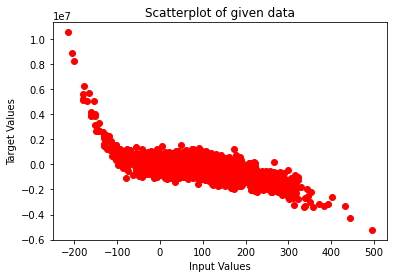

In [6]:
plt.scatter(X,y,color='red')
plt.title('Scatterplot of given data')
plt.xlabel('Input Values')
plt.ylabel('Target Values')
plt.show()

## spliting the data into training and test (70% training , 30% testing)

In [7]:
# create the training set and the test set 
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=1)

In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# KNN regression

here, first finding best k value using gridSearch

In [9]:
grid_params = { 'n_neighbors' : list(range(1,220,2)),
               'weights' : ['distance'],
               'metric' : ['minkowski','euclidean','manhattan']}

In [10]:
gs = GridSearchCV(KNeighborsRegressor(), grid_params, verbose = 1, cv=10, n_jobs = -1)

In [11]:
g_res = gs.fit(X_train, y_train)

Fitting 10 folds for each of 330 candidates, totalling 3300 fits


In [12]:
g_res.best_score_

0.6023964762646074

In [13]:
g_res.best_params_

{'metric': 'minkowski', 'n_neighbors': 23, 'weights': 'distance'}

{'metric': 'minkowski', 'n_neighbors': 23, 'weights': 'distance'} which means at k = 23 we will get best scores or metrics

In [14]:
knn = KNeighborsRegressor(n_neighbors =23, weights = 'distance',metric = 'minkowski')
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

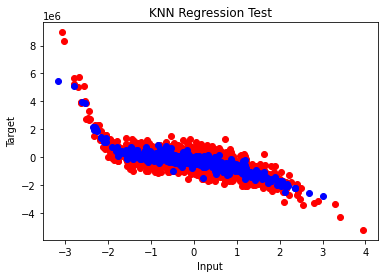

In [15]:
X_grid=np.arange(min(X),max(X),0.1)
X_grid=X_grid.reshape((len(X_grid),1))
plt.scatter(X_train,y_train,color='red')
plt.scatter(X_test,y_pred,color='blue')
plt.title('KNN Regression Test')
plt.xlabel('Input')
plt.ylabel('Target')
plt.show()

In [16]:
mean_squared_error(y_test, y_pred)**(1/2)

580873.2530555852

at k =23 mean squared error is 580873.2530555852 which is better than at k =3 i.e 599771

## XGBoost regression

In [17]:
xgb = XGBRegressor(randome_state=1)
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)

[11:57:28] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "randome_state" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




Explore the results visually...

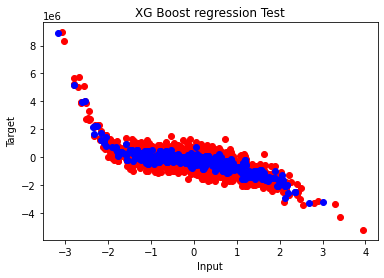

In [18]:
X_grid=np.arange(min(X),max(X),0.1)
X_grid=X_grid.reshape((len(X_grid),1))
plt.scatter(X_train,y_train,color='red')
plt.scatter(X_test,y_pred,color='blue')
plt.title('XG Boost regression Test')
plt.xlabel('Input')
plt.ylabel('Target')
plt.show()

In [19]:
mean_squared_error(y_test, y_pred)**(1/2)

549266.2409571942

This is a signifianct improvement over the KNN model above, and does a better job at fitting the data.

# Neural Networks for regression

In [20]:
ann = MLPRegressor(hidden_layer_sizes=(500,200,100,10), max_iter=1000)
ann.fit(X_train, y_train)
y_pred = ann.predict(X_test)

Explore the results visually...

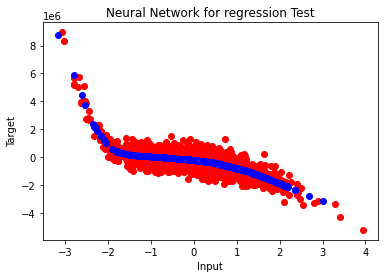

In [21]:
X_grid=np.arange(min(X),max(X),0.1)
X_grid=X_grid.reshape((len(X_grid),1))
plt.scatter(X_train,y_train,color='red')
plt.scatter(X_test,y_pred,color='blue')
plt.title('Neural Network for regression Test')
plt.xlabel('Input')
plt.ylabel('Target')
plt.show()

In [22]:
mean_squared_error(y_test, y_pred)**(1/2)

493330.6427915841

here MLPRegression did much more significient job of data fitting over the KNN and XG Boost regression.
KNN and XGBoost are indicating that they may be 'overfitting' the data and alot of distrubance and The MLPRegression has done an excellent job at identifing the underlying relationship.
we can simple say that if we know or identify the data curve by seeing scatterplot we can apply direct linear regression or any polynomial regression otherwise we go with other techniques like KNN, XG Boost regression, Neural networks